In [154]:
using LinearAlgebra, LaTeXStrings, CairoMakie, SparseArrays

In [155]:
function pde_parabolic(u0::AbstractVector, xr, D::Real, ti::Real, tf::Real, Nt::Integer=300)
    println(length(u0))
    @assert length(u0) > 3
    @assert length(xr) == 2
    N = length(u0)
    t = range(ti, tf, length = Nt+1)[2:end]
    x = range(xr[1], xr[end], length=N)
    println(x)
    Δt = step(t)
    h = step(x)
    println("Δt = $(Δt),  h = $h")
    α, β = u0[1], u0[end]
    
    result = Array{Float64}(undef, (length(u0), Nt+1))
    result[:, 1] = u0[:]
    λ = D*Δt/h^2
    println("λ = $λ")
    Au = [0 ; fill(λ, N-2)]
    Ad = [fill(λ, N-2); 0]
    Add = [1; fill(1-2*λ, N-2); 1]
    A = Tridiagonal(Ad, Add, Au)
    for i ∈ 1:Nt 
        result[:, i+1] =  A*result[:, i]
    end
    return A, result

end

    

pde_parabolic (generic function with 2 methods)

141
0.0:0.1:14.0
Δt = 0.0011666666666666668,  h = 0.1
λ = 0.4666666666666666


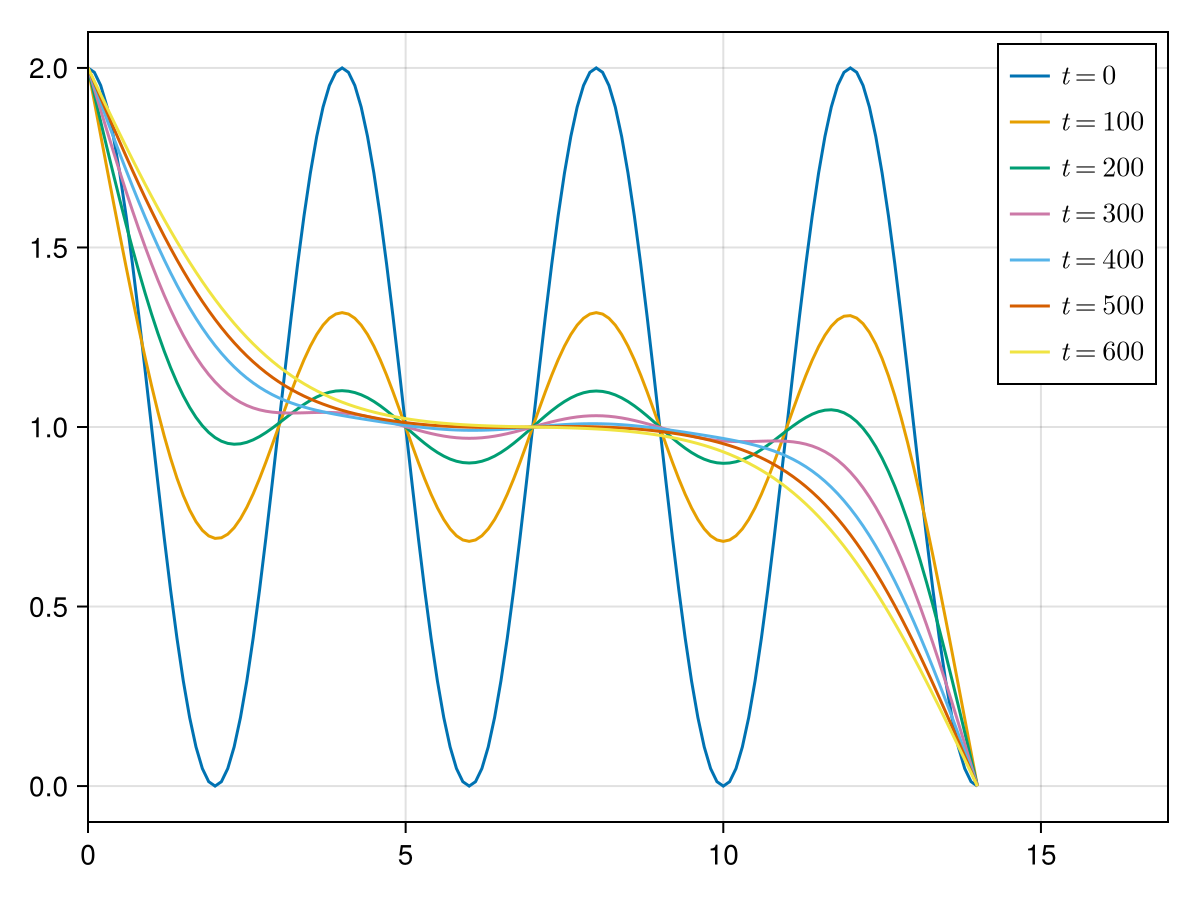

In [184]:
t=0:0.1:14
A, s=pde_parabolic(cos.(π/2 .* t ) .+ 1.0, (0, 14), 4, 0, 0.7, 600)
fig, ax = lines(t, s[:, 1], label=L"t=0")
lines!(ax, t, s[:, 100], label=L"t=100")
lines!(ax, t, s[:, 200], label=L"t=200")
lines!(ax, t, s[:, 300], label=L"t=300")
lines!(ax, t, s[:, 400], label=L"t=400")
lines!(ax, t, s[:, 500], label=L"t=500")
lines!(ax, t, s[:, 600], label=L"t=600")
axislegend(position = :rt)
xlims!(ax, (0, 17))
fig

In [153]:
det(inv(A))*det(A)

0.9999999999999963

In [94]:
s

30×301 Matrix{Float64}:
 1.0          1.0          1.0          …  1.0          1.0
 0.178327     0.256969     0.318924        0.905045     0.905201
 0.0318004    0.0458245    0.0660332       0.811431     0.811737
 0.00567086   0.00817173   0.0117755       0.720443     0.720886
 0.00101127   0.00145724   0.00209988      0.633258     0.63382
 0.000180336  0.000259864  0.000374465  …  0.550896     0.551555
 3.21587e-5   4.63408e-5   6.67771e-5      0.474189     0.47492
 5.73476e-6   8.26379e-6   1.19081e-5      0.403757     0.404534
 1.02266e-6   1.47366e-6   2.12354e-6      0.339998     0.340797
 1.82368e-7   2.62792e-7   3.78684e-7      0.283096     0.283892
 ⋮                                      ⋱               ⋮
 1.88601e-16  2.71775e-16  3.91628e-16     0.0123323    0.0124763
 3.36326e-17  4.84647e-17  6.98378e-17     0.00874772   0.00885862
 5.9976e-18   8.64255e-18  1.24539e-17     0.00611522   0.00619904
 1.06953e-18  1.5412e-18   2.22087e-18     0.00420227   0.0042642
 1.90726e

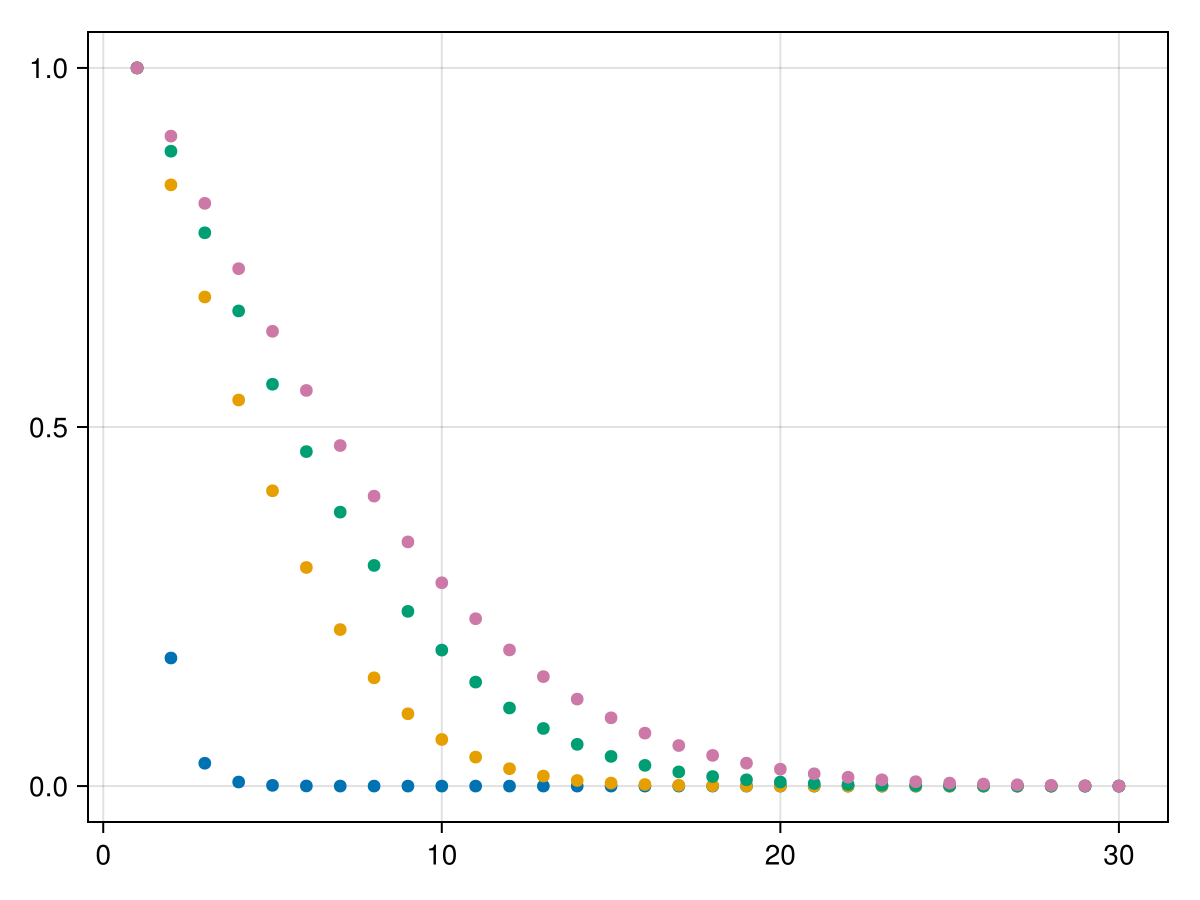

In [95]:
fig, ax = plot(s[:, 1])
plot!(ax, s[:, 100])
plot!(ax, s[:, 200])
plot!(ax, s[:, 300])
fig